<a href="https://colab.research.google.com/github/lumagri/Python_to_Data_Science/blob/main/5_Pandas_diferentes_formatos_Input_Output/Pandas_Input_Output(IO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando os nomes

In [60]:
import pandas as pd

In [61]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json') #Importando dados formato json de uma pagina Http 
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [62]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [63]:
nomes_f.sample(5) #Pega uma amostra aleatória e apresenta. Toda vez que o código rodar, será apresentado uma nova lista de amostras. 

,nome,regiao,freq,rank,sexo
177,JENIFER,0,88574,178,F
56,SUELI,0,243899,57,F
167,TAINARA,0,94927,168,F
98,THAIS,0,168816,99,F
23,LARISSA,0,360523,24,F


In [64]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
31,RICARDO,0,467835,32,M
115,MILTON,0,125669,116,M
60,JEFERSON,0,252171,61,M
48,RENATO,0,327610,49,M
182,CHARLES,0,72715,183,M


In [65]:
nomes_f.count()

nome      200
regiao    200
freq      200
rank      200
sexo      200
dtype: int64

In [66]:
print('Quantidade de nomes:' + str(len(nomes_f) + len(nomes_m))) # QUando eu quero unir números e texto eu preciso avisar que os números sejam convertidos em strings. Por isso o str antes dos len. Isso precisa ser feito apenas uma vez e não em toda a representação numérica. 

Quantidade de nomes:400


In [67]:
frames = [nomes_f, nomes_m]

In [68]:
nomes = pd.concat(frames)[ 'nome'].to_frame()
nomes.sample(5)

,nome
116,DOMINGOS
116,MARCELA
79,VALDIR
9,MARCOS
120,JOSIANE


#Incluindo um ID dos alunos

In [69]:
import numpy as np
np.random.seed(123)

In [70]:
total_alunos = len(nomes)
total_alunos

400

In [71]:
nomes[ 'id_aluno'] = np.random.permutation(total_alunos) + 1

In [72]:
nomes.sample(10)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


In [73]:
dominios = [ '@dominiodoemail.com.br', '@servicodoemail.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [74]:
nomes.head(10)

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com.br
2,FRANCISCA,304,@servicodoemail.com.br
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com.br
5,JULIANA,310,@servicodoemail.com.br
6,MARCIA,55,@dominiodoemail.com.br
7,FERNANDA,288,@servicodoemail.com.br
8,PATRICIA,379,@servicodoemail.com.br
9,ALINE,92,@dominiodoemail.com.br


In [75]:
nomes ['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [76]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com.br,jose@servicodoemail.com.br
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


#Criando a tabela Cursos

In [77]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import html5lib

In [79]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
pd.read_html(url)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [80]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [81]:
type(cursos)

list

In [82]:
cursos = cursos[0] #para converter uma lista em dataframe é só redefinir a lista colocando [0]

In [83]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [84]:
type(cursos)

pandas.core.frame.DataFrame

In [85]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


#Alterando o Index dos crusos

In [114]:
cursos.rename(columns = {'Nome do curso': 'nome_do_curso'}) #Para renomear nome das variáveis de um dataframe 

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [87]:
cursos[ 'id'] = cursos.index + 1

In [88]:
cursos.head(10) # Temos o problema de que pode-se confundir o id do curso com o index do dataframe. 

,Nome do curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [89]:
cursos = cursos.set_index('id') # É Possível setar o index pelo id com essa função 

In [90]:
cursos.head(10) # Como o index passou a ser igual ao id, a numeração inicia no número 1. Se fosse o contrário, o index inicia no 0. 
#Também lembrar que as vezes o notebook já rodou uma definição e o estado foi modificado. Caso o código seja rodado novamente, há grandes chances de dar erro. O erro não estará no código mas sim na mudança dos estados a cima. 
#Para resolver isso é necessário rodar os códigos desde cima para redefinir os status.

,Nome do curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


#Matriculando os alunos nos cursos

In [91]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [92]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com.br,clara@servicodoemail.com.br,3
64,ROBSON,290,@dominiodoemail.com.br,robson@dominiodoemail.com.br,2
13,DANIEL,195,@servicodoemail.com.br,daniel@servicodoemail.com.br,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [93]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [94]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


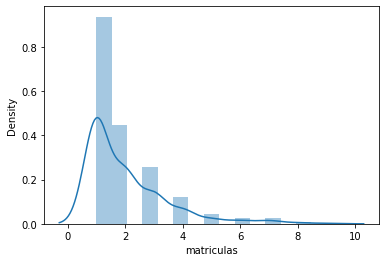

In [95]:
sns.distplot(nomes.matriculas)

In [96]:
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

In [97]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,2
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,3
24,CLAUDIA,16,@servicodoemail.com.br,claudia@servicodoemail.com.br,4
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


#Selecionando cursos
##Quais cursos os alunos estão inscritos?
como fazer isso de forma eficiente?

In [98]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
175,RIAN,209,@dominiodoemail.com.br,rian@dominiodoemail.com.br,2
96,TANIA,211,@servicodoemail.com.br,tania@servicodoemail.com.br,4
116,DOMINGOS,150,@servicodoemail.com.br,domingos@servicodoemail.com.br,1
142,HUGO,378,@servicodoemail.com.br,hugo@servicodoemail.com.br,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3


In [99]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [100]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [ id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [110]:
matriculas.head(15)

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3
5,343,6
6,343,19
7,343,2
8,310,12
9,310,12


Quantos alunos tem inscritos em cada curso? Para isso é possível utilizar esse dataframe criado acima. 

In [117]:
cursos = cursos.rename(columns= {'Nome do curso': 'nome_do_curso'})
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [120]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python
6,63,PHP com MySql
7,36,.NET para web
8,50,Novas integrações com Java
9,11,TDD com Java


In [121]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
66,PRISCILA,122,@servicodoemail.com.br,priscila@servicodoemail.com.br,2
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,1
159,ARNALDO,359,@servicodoemail.com.br,arnaldo@servicodoemail.com.br,1


In [122]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [123]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [125]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [126]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python


# Saida em diferentes formatos

In [127]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web


In [183]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index=False)

In [184]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,18,Lógica de programação
1,34,Java para Web
2,41,C# para Web
3,17,Ruby on Rails
4,53,Cursos de Python
5,63,PHP com MySql
6,36,.NET para web
7,50,Novas integrações com Java
8,11,TDD com Java
9,1,Código limpo com C#


In [131]:
matriculas_json = matriculas_por_curso.to_json()

In [132]:
matriculas_json

'{"quantidade_de_alunos":{"1":18,"2":34,"3":41,"4":17,"5":53,"6":63,"7":36,"8":50,"9":11,"10":1,"11":20,"12":69,"13":7,"14":63,"15":81,"16":45,"17":70,"18":17,"19":57,"20":54},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [137]:
matriculas_html = matriculas_por_curso.to_html()

In [138]:
print(matriculas_html) 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>18</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>34</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>41</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>17</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>53</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>63</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>36</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>50</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>11</td>


#Criando banco SQL

In [140]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


##Buscando do banco sql

In [160]:
query = 'select * from matriculas where quantidade_de_alunos > 20' #Isso é o importante sobre SQL.

In [161]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,34,Java para Web
1,3,41,C# para Web
2,5,53,Cursos de Python
3,6,63,PHP com MySql
4,7,36,.NET para web
5,8,50,Novas integrações com Java
6,12,69,Hardware básico
7,14,63,Desenvolvendo jogos
8,15,81,Análise de dados
9,16,45,Estatística básica


In [144]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,34
2,C# para Web,41
3,Ruby on Rails,17
4,Cursos de Python,53
5,PHP com MySql,63
6,.NET para web,36
7,Novas integrações com Java,50
8,TDD com Java,11
9,Código limpo com C#,1


In [145]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [146]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,34
2,C# para Web,41
3,Ruby on Rails,17
4,Cursos de Python,53
5,PHP com MySql,63
6,.NET para web,36
7,Novas integrações com Java,50
8,TDD com Java,11
9,Código limpo com C#,1


In [147]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,63
11,Hardware básico,69
13,Desenvolvendo jogos,63
14,Análise de dados,81
16,Internet das coisas,70


In [148]:
muitas_matriculas.query('quantidade_de_alunos > 80')

,nome_do_curso,quantidade_de_alunos
14,Análise de dados,81


In [149]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [150]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
14,Análise de dados,81


## Escrevendo no banco

In [151]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [152]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nomes dos alunos e alunas da próxima turma

In [163]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python
6,63,PHP com MySql
7,36,.NET para web
8,50,Novas integrações com Java
9,11,TDD com Java


In [164]:
matriculas

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3
...,...,...
802,383,7
803,383,5
804,366,8
805,366,16


In [167]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
17,379,16
21,218,16
34,185,16
37,191,16
56,49,16
62,242,16
68,103,16
89,268,16
95,268,16
111,241,16


In [168]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
48,RAQUEL,391,@dominiodoemail.com.br,raquel@dominiodoemail.com.br,2
14,JESSICA,185,@servicodoemail.com.br,jessica@servicodoemail.com.br,7
42,MARLENE,268,@servicodoemail.com.br,marlene@servicodoemail.com.br,9
111,CLEITON,223,@dominiodoemail.com.br,cleiton@dominiodoemail.com.br,1
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1


In [169]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,16,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,1
6,16,CINTIA,@dominiodoemail.com.br,cintia@dominiodoemail.com.br,2
8,16,IRACI,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,4
29,16,LUCAS,@servicodoemail.com.br,lucas@servicodoemail.com.br,3
39,16,DENISE,@servicodoemail.com.br,denise@servicodoemail.com.br,2
40,16,WELLINGTON,@servicodoemail.com.br,wellington@servicodoemail.com.br,2
49,16,BEATRIZ,@dominiodoemail.com.br,beatriz@dominiodoemail.com.br,2
53,16,JANAINA,@servicodoemail.com.br,janaina@servicodoemail.com.br,5
53,16,JANAINA,@servicodoemail.com.br,janaina@servicodoemail.com.br,5


In [170]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3        VALDEMIR
6          CINTIA
8           IRACI
29          LUCAS
39         DENISE
40     WELLINGTON
49        BEATRIZ
53        JANAINA
53        JANAINA
54      MARGARIDA
63        LUCIANO
72       GABRIELE
72       GABRIELE
72       GABRIELE
103        JOSEFA
104        MILTON
115        SILVIA
157         LEILA
177        ISAIAS
182        NICOLE
185       JESSICA
191         JULIA
214         JAIME
218        CAMILA
226      VALDECIR
236      LEONARDO
241         LUCIA
242         SONIA
244     VANDERLEI
260       VICENTE
264        TERESA
268       MARLENE
268       MARLENE
294         DIEGO
298        GISELE
305        ADEMIR
349        DAMIAO
352        SAMARA
366       GEOVANE
373       EMERSON
379      PATRICIA
386        YASMIN
390        MARCOS
393         JOSUE
395      MAURICIO
Name: nome, dtype: object

In [171]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
53,JANAINA


In [174]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [175]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [176]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [177]:
proxima_turma

,nome
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
53,JANAINA


In [178]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'. format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
3,VALDEMIR
6,CINTIA
8,IRACI
29,LUCAS
39,DENISE
40,WELLINGTON
49,BEATRIZ
53,JANAINA
53,JANAINA


In [179]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'. format(nome_curso)})

In [180]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
191,JULIA
373,EMERSON
260,VICENTE
53,JANAINA
72,GABRIELE


# Excel

In [181]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [182]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,VALDEMIR
1,CINTIA
2,IRACI
3,LUCAS
4,DENISE
5,WELLINGTON
6,BEATRIZ
7,JANAINA
8,JANAINA
9,MARGARIDA
